In [34]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data
import matplotlib as mpl
from matplotlib.patches import Polygon

In [92]:
red = pd.read_csv('../resources/MIP_normalizada.csv', index_col=0, header=0)
red_n = red.to_numpy()

In [50]:
print(red_n)

[[1.03188249e-02 0.00000000e+00 1.54193071e-03 ... 0.00000000e+00
  1.73505441e-09 3.25631888e-03]
 [0.00000000e+00 1.67226270e-01 9.56472703e-03 ... 7.99857689e-03
  1.23770886e-06 7.92918447e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.47209161e-07 5.93743616e-06]
 ...
 [3.09190035e-03 6.86007024e-04 4.52908952e-04 ... 0.00000000e+00
  3.83134710e-03 0.00000000e+00]
 [5.36301790e-04 1.06041577e-04 6.86503085e-05 ... 1.93573864e-02
  8.85082917e-02 1.73362419e-02]
 [6.87600990e-03 1.94145049e-05 1.58028403e-04 ... 4.22118393e-02
  5.85882859e-02 5.43356983e-02]]


In [93]:
red

Cultivo de cereales, oleaginosas y forrajeras  \
Cultivo de cereales, oleaginosas y forrajeras                                            0.010319   
Cultivo de hortalizas, legumbres, flores y plan...                                       0.000000   
Cultivo de frutas y nueces                                                               0.000000   
Cultivos industriales                                                                    0.000000   
Producción de semillas                                                                   0.783146   
...                                                                                           ...   
Servicios sociales                                                                       0.000000   
Servicios de saneamiento                                                                 0.000870   
Actividad de asociaciones                                                                0.003092   
Servicios de cine, radio y televisión                                                    0.000536   
Servicios personales, de reparación, actividade...                                       0.006876   

                                                    Cultivo de hortalizas, legumbres, flores y plantas ornamentales  \
Cultivo de cereales, oleaginosas y forrajeras                                                0.000000                 
Cultivo de hortalizas, legumbres, flores y plan...                                           0.167226                 
Cultivo de frutas y nueces                                                                   0.000000                 
Cultivos industriales                                                                        0.000000                 
Producción de semillas                                                                       0.016374                 
...                                                                                               ...                 
Servicios sociales                                                                           0.000000                 
Servicios de saneamiento                                                                     0.000193                 
Actividad de asociaciones                                                                    0.000686                 
Servicios de cine, radio y televisión                                                        0.000106                 
Servicios personales, de reparación, actividade...                                           0.000019                 

                                                    Cultivo de frutas y nueces  \
Cultivo de cereales, oleaginosas y forrajeras                         0.001542   
Cultivo de hortalizas, legumbres, flores y plan...                    0.009565   
Cultivo de frutas y nueces                                            0.000000   
Cultivos industriales                                                 0.000000   
Producción de semillas                                                0.029820   
...                                                                        ...   
Servicios sociales                                                    0.000000   
Servicios de saneamiento                                              0.000127   
Actividad de asociaciones                                             0.000453   
Servicios de cine, radio y televisión                                 0.000069   
Servicios personales, de reparación, actividade...                    0.000158   

                                                    Cultivos industriales  \
Cultivo de cereales, oleaginosas y forrajeras                    0.001601   
Cultivo de hortalizas, legumbres, flores y plan...               0.000000   
Cultivo de frutas y nueces                                       0.000000   
Cultivos industriales                                            0.020212   
Producción de semillas                  

In [56]:
def verGrafoCentralizado(df):
    ig, ax = plt.subplots(figsize=(40, 40))
    plt.axis("off")
    G = nx.DiGraph(df)
    
    centrality = nx.eigenvector_centrality(G, max_iter=1000) 
    values = np.array(list(centrality.values()))
    norm_values = (values - values.min()) / (values.max() - values.min())
    
    colores_nodo = plt.cm.viridis(norm_values)
    
    grado_nodo = np.array([G.out_degree[i] for i in range(len(G))])
    tamaños_nodo = 400 + (grado_nodo * 200)
    edge_widths = qbn_io.normalise_weights(qbn_io.edge_weights(G),10)
    
    node_colors = qbn_io.colorise_weights(list(centrality),beta = False)
    node_to_color = dict(zip(G.nodes,node_colors))
    edge_colors = []
    for src,_ in G.edges:
        edge_colors.append(node_to_color[src])
    
    pos_nodos = nx.spring_layout(G)
    
    nx.draw_networkx_nodes(G,
                           pos_nodos,
                           node_color=colores_nodo,
                           node_size=tamaños_nodo,
                           edgecolors='grey',
                           linewidths=10,
                           alpha=0.6,
                           ax=ax
                           )
    
    nx.draw_networkx_edges(G,
                          pos_nodos,
                          edge_color=edge_colors,
                          width=edge_widths,
                          arrows=True,
                          arrowsize=5,
                          alpha=0.6,
                          ax=ax,
                          arrowstyle='->',
                          node_size= 10,
                          connectionstyle='arc3,rad=0.15')
    
    nx.draw_networkx_labels(G,
                           pos_nodos,
                           font_size=17,
                           ax=ax,
                            labels=None
    )
    
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=values.min(), vmax=values.max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax = ax)
    cbar.set_label('Centralidad de autovectores', font_size= 15)
    
    plt.show()

AttributeError: 'Text' object has no property 'font_size'

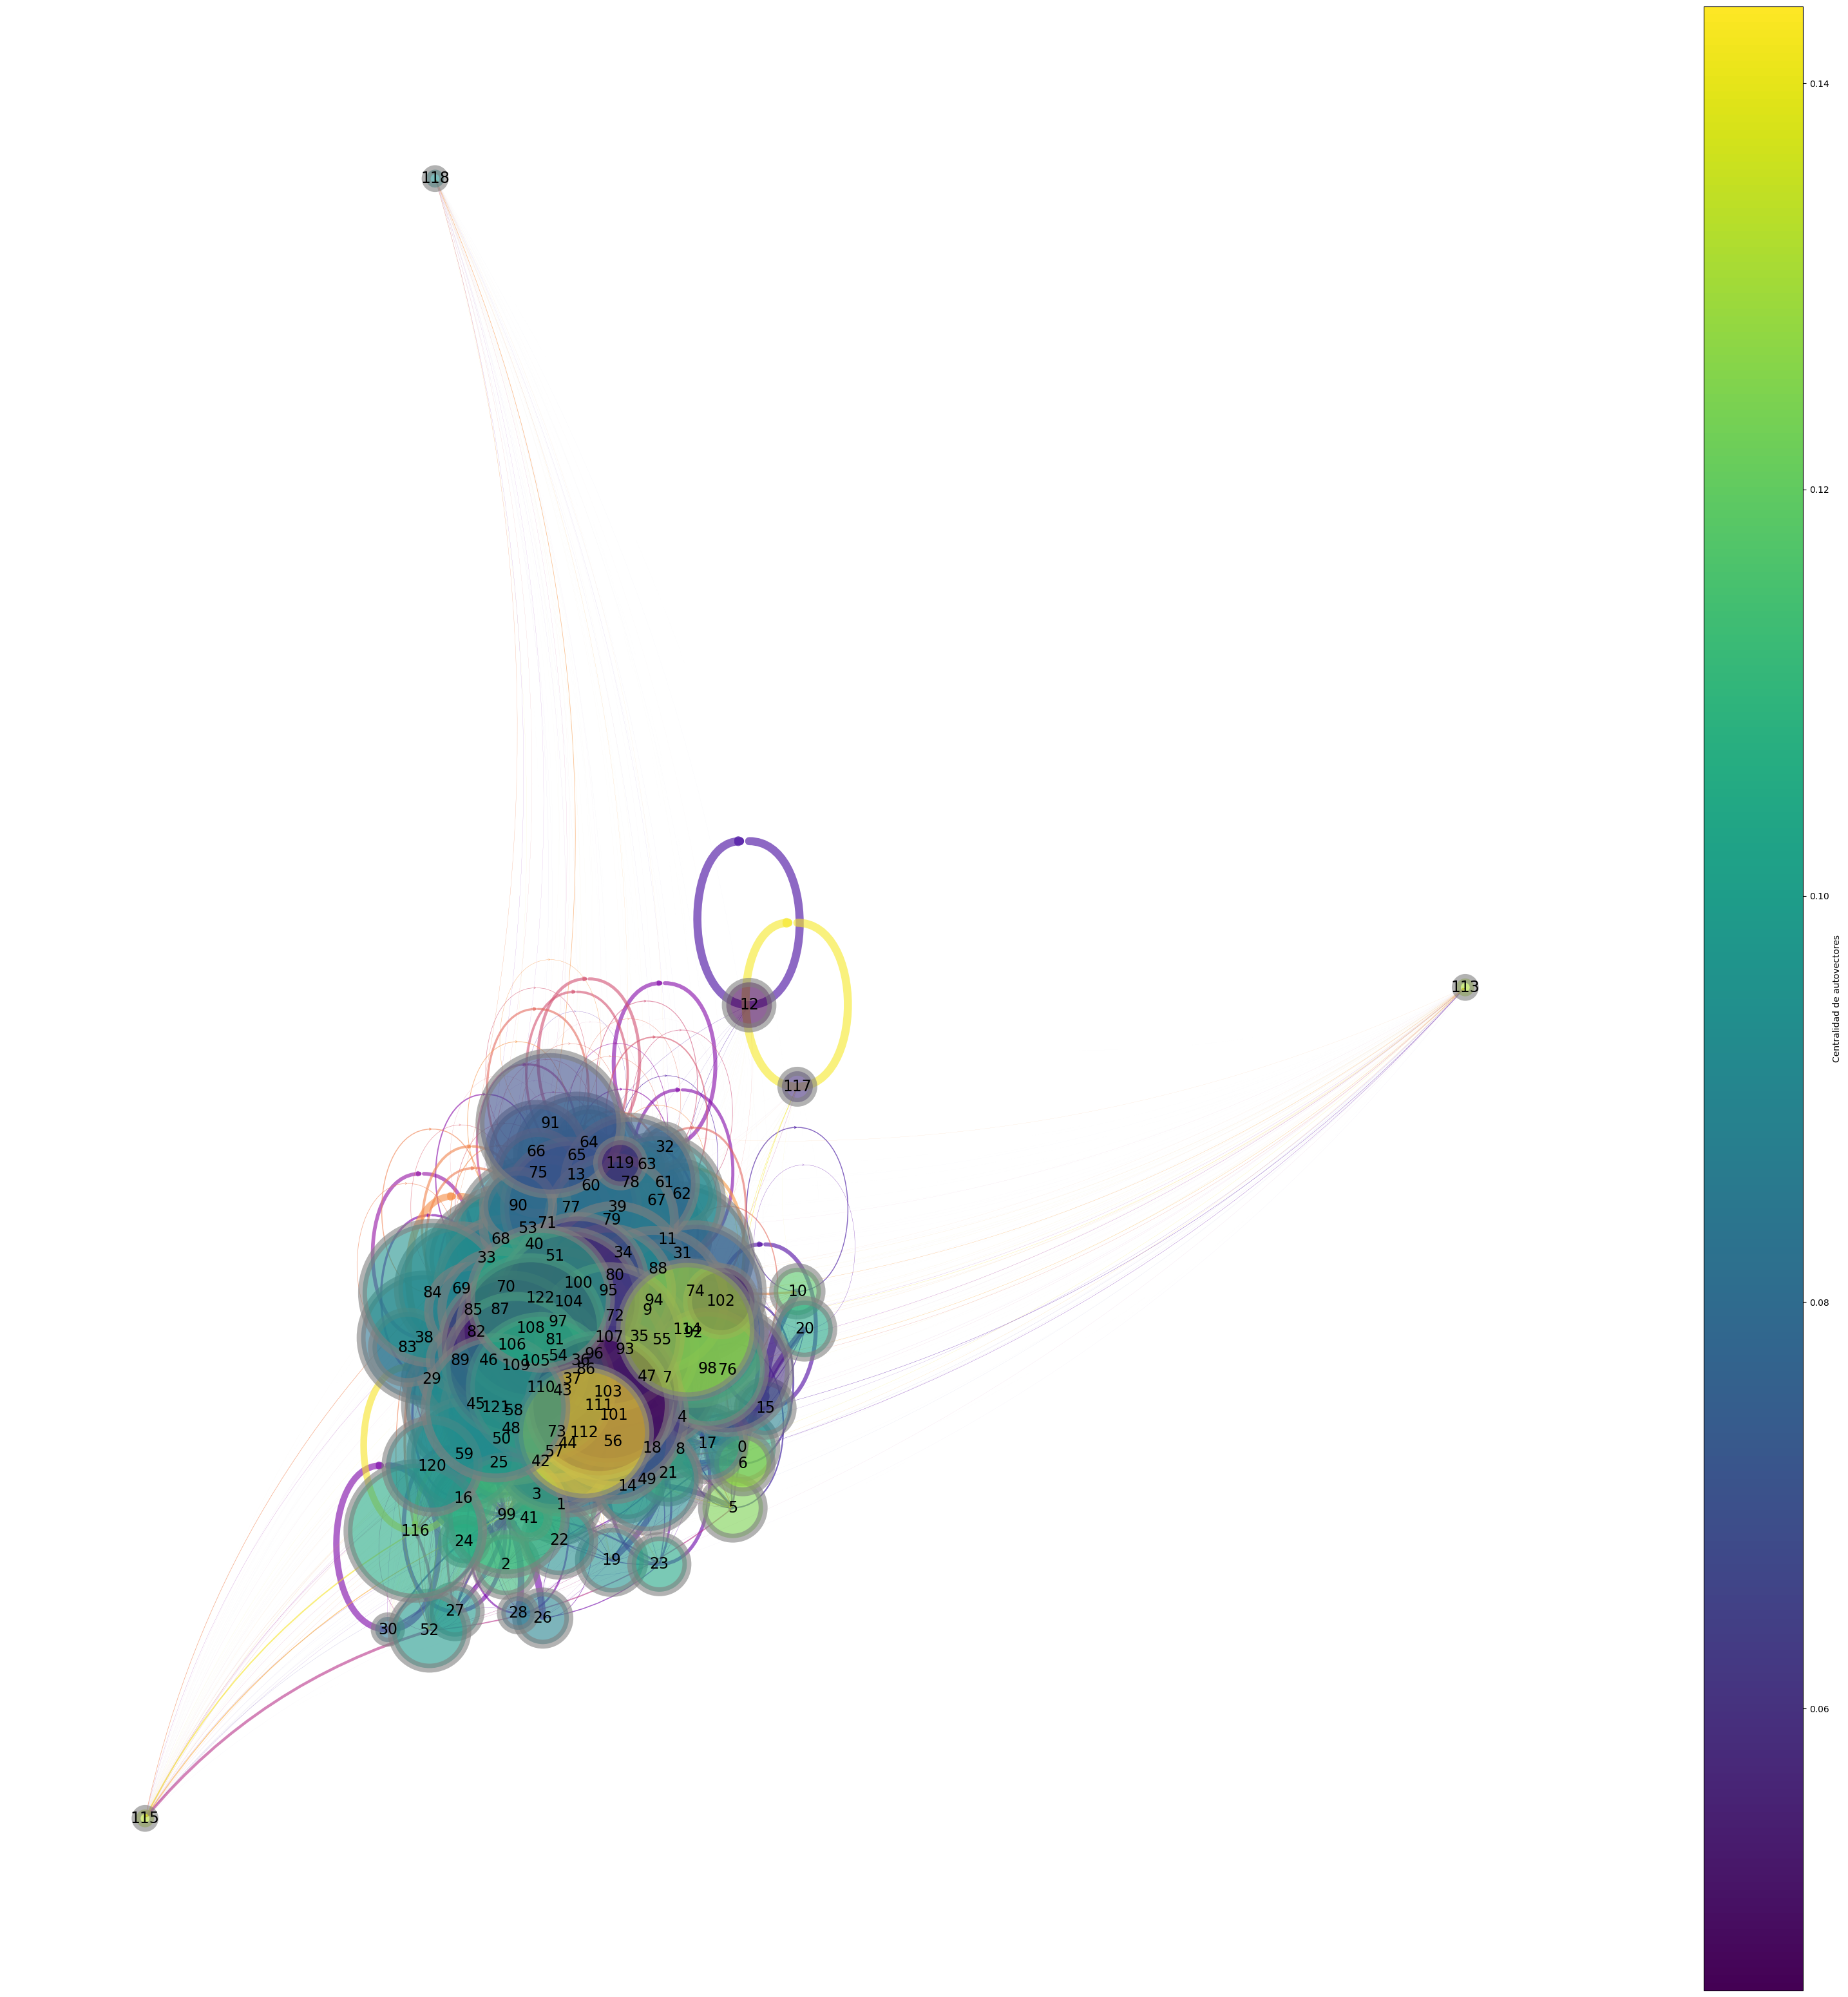

In [57]:

verGrafoCentralizado(red_n)

True


In [87]:
def verGrafoAbierto(df):      
    fig, ax = plt.subplots(figsize=(25, 25))
    plt.axis("off")
    G = nx.DiGraph()
    N = len(df)
    
    #Agrego nodos.
    for i, col in enumerate(df.columns):
      G.add_node(col)
    
    grado_nodo = np.zeros(len(df)) 
    for i in range(len(df)):
      aristas = 0;
      for j in range(len(df)):
        if df.iloc[i,j] > 0.2:
          aristas = aristas + 1
      grado_nodo[i] = aristas
    tamaños_nodo = 400 + (grado_nodo * 200)
    edge_widths = []
    for i in range(N):
      for j in range(N):
        a = df.iloc[i,j]
        G.add_edge(df.columns[i], df.columns[j])
        width = a
        edge_widths.append(width)
    
    pos_nodos = nx.spring_layout(G)
    H = nx.DiGraph(df.to_numpy())
    centrality = nx.eigenvector_centrality(H, max_iter=1000) 
    values = np.array(list(centrality.values()))
    norm_values = (values - values.min()) / (values.max() - values.min())
    colores_nodo = plt.cm.viridis(norm_values)
    
    nx.draw_networkx_nodes(G,
                           pos_nodos,
                           node_color=colores_nodo,
                           node_size=tamaños_nodo,
                           edgecolors=colores_nodo,
                           linewidths=10,
                           alpha=0.6,
                           ax=ax
                           )
    
    nx.draw_networkx_edges(G,
                          pos_nodos,
                          edge_color=colores_nodo,
                          width=edge_widths,
                          arrows=True,
                          arrowsize=5,
                          alpha=0.6,
                          ax=ax,
                          arrowstyle='->',
                          node_size= 10,
                          connectionstyle='arc3,rad=0.15')
    
    nx.draw_networkx_labels(G,
                           pos_nodos,
                           font_size=10,
                           ax=ax
    )
    
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=values.min(), vmax=values.max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax = ax)
    cbar.set_label('Centralidad de autovectores', font_size= 10)
    
    plt.show()
    

AttributeError: 'Text' object has no property 'font_size'

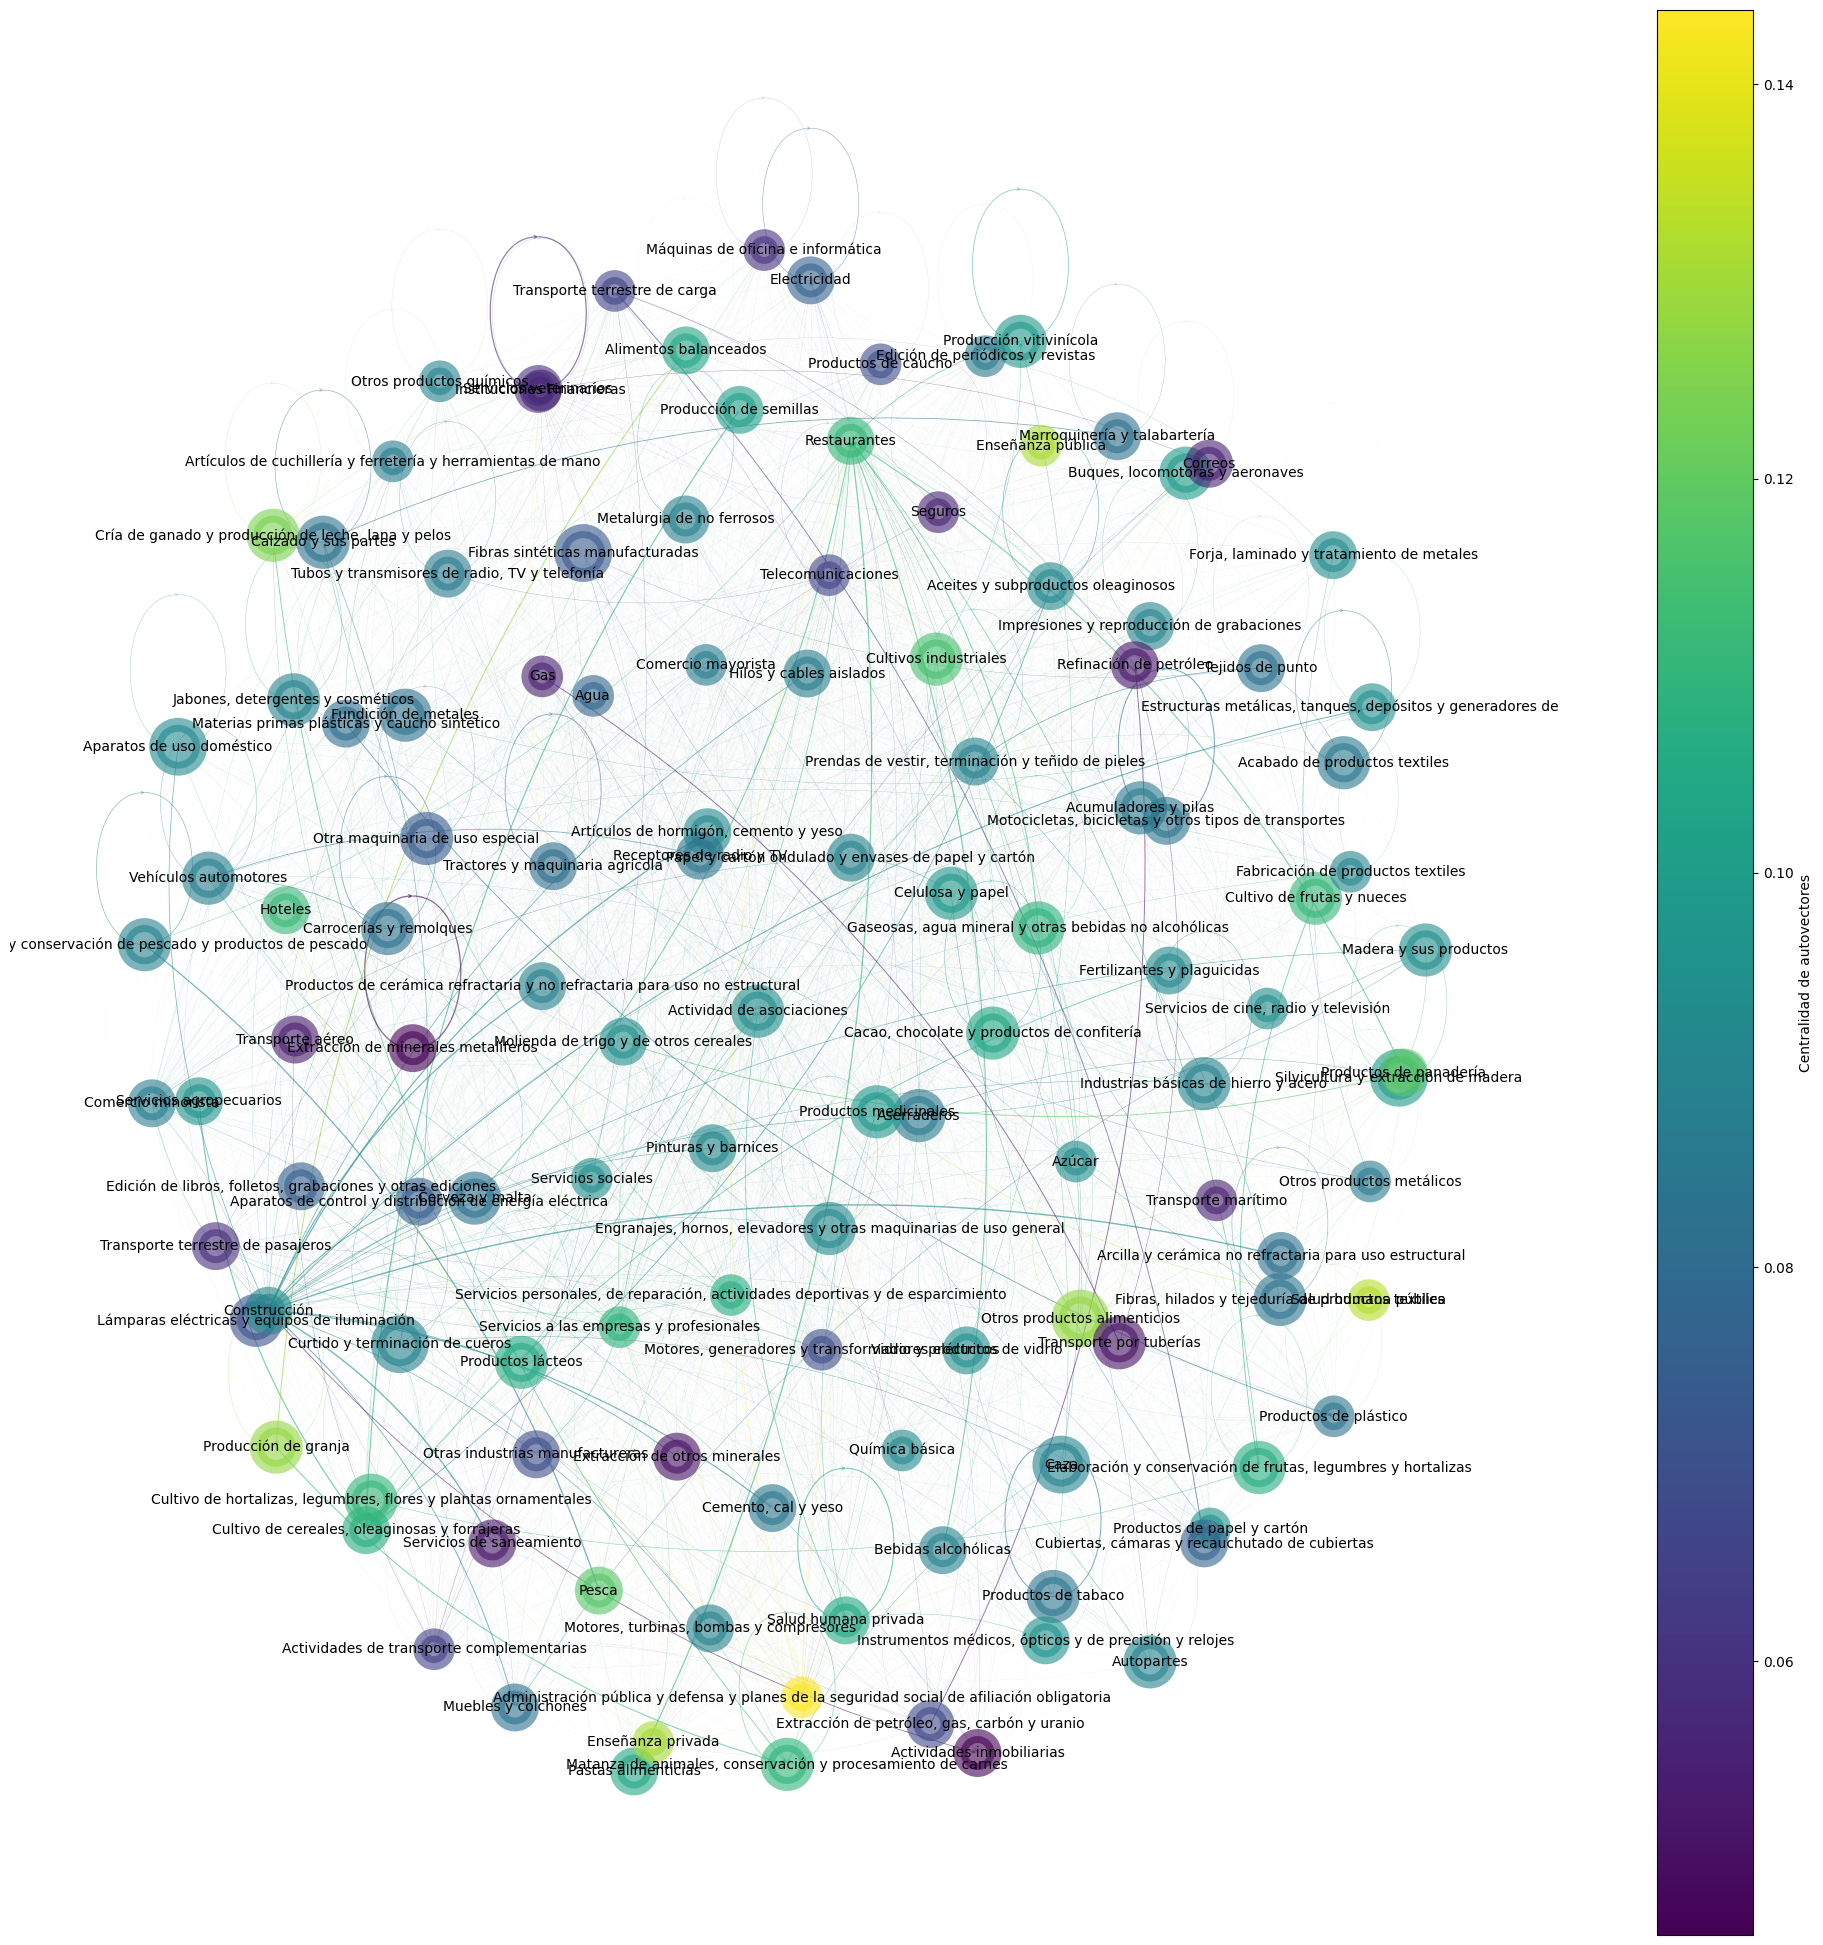

In [94]:
verGrafoAbierto(red)

In [98]:
def verInflacion(df, precios_finales, precios_iniciales):
    fig, ax = plt.subplots(figsize=(25, 25))
    plt.axis("off")
    
    G = nx.DiGraph()
    N = len(df)
    
    #Agrego nodos.
    for i, col in enumerate(df.columns):
      G.add_node(col)
    edge_colors = []
    edge_widths = []
    for i in range(N):
      for j in range(N):
        a = df.iloc[i,j]
        G.add_edge(df.columns[i], df.columns[j])
        width = a
        edge_widths.append(width)
    
    grado_nodo = np.array([G.out_degree[(sector)] for sector in df.columns])  
    price_changes = np.array(precios_finales) - np.array(precios_iniciales)
    
    max_change = max(price_changes)
    min_change = min(price_changes)
    norm_changes = (price_changes - min_change) / (max_change - min_change)
            
    colors = plt.cm.Reds(norm_changes)
    tamaños_nodo = 400 + (grado_nodo * 200)
    tamaños_nodo.tolist() 
    
    
    
    pos_nodos = nx.spring_layout(G)
    
    nx.draw_networkx_nodes(G,
                           pos_nodos,
                           node_color=colors,
                           node_size=tamaños_nodo,
                           edgecolors=colors,
                           linewidths=10,
                           alpha=1,
                           ax=ax
                           )
    
    nx.draw_networkx_edges(G,
                          pos_nodos,
                          edge_color='gray',
                          width=1,
                          arrows=True,
                          arrowsize=5,
                          alpha=0.6,
                          ax=ax,
                          arrowstyle='->',
                          node_size= 10,
                          connectionstyle='arc3,rad=0.15')
    
    nx.draw_networkx_labels(G,
                           pos_nodos,
                           font_size=12,
                           ax=ax
    )
    
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=min_change, vmax=max_change))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Variación de precios', font_size=10)
    plt.show()

In [96]:
sectores = ['luz','chapa','campo','chip','comida']

pesos = np.array([[0,0.25,0.1,0.2,0.5],[0.3,0.4,0,0.7,0.15],[0,0.9,0,0.1,0.8],[0.1,0,0.2,0,0],[0.5,0,0,0,0]])
test = pd.DataFrame(data=pesos,columns=sectores,index=sectores)

pesos_ciclo = np.array([[0,0.25,0.1,0,0],[0,0,0,0.7,0.15],[0,0,0,0,0.8],[0.2,0,0,0,0],[0,0,0,0,0]])
test_ciclo = pd.DataFrame(data=pesos_ciclo,columns=sectores,index=sectores)

In [9]:
G= nx.DiGraph(test)
G['luz']['chapa']['weight']

0.25

AttributeError: 'Text' object has no property 'font_size'

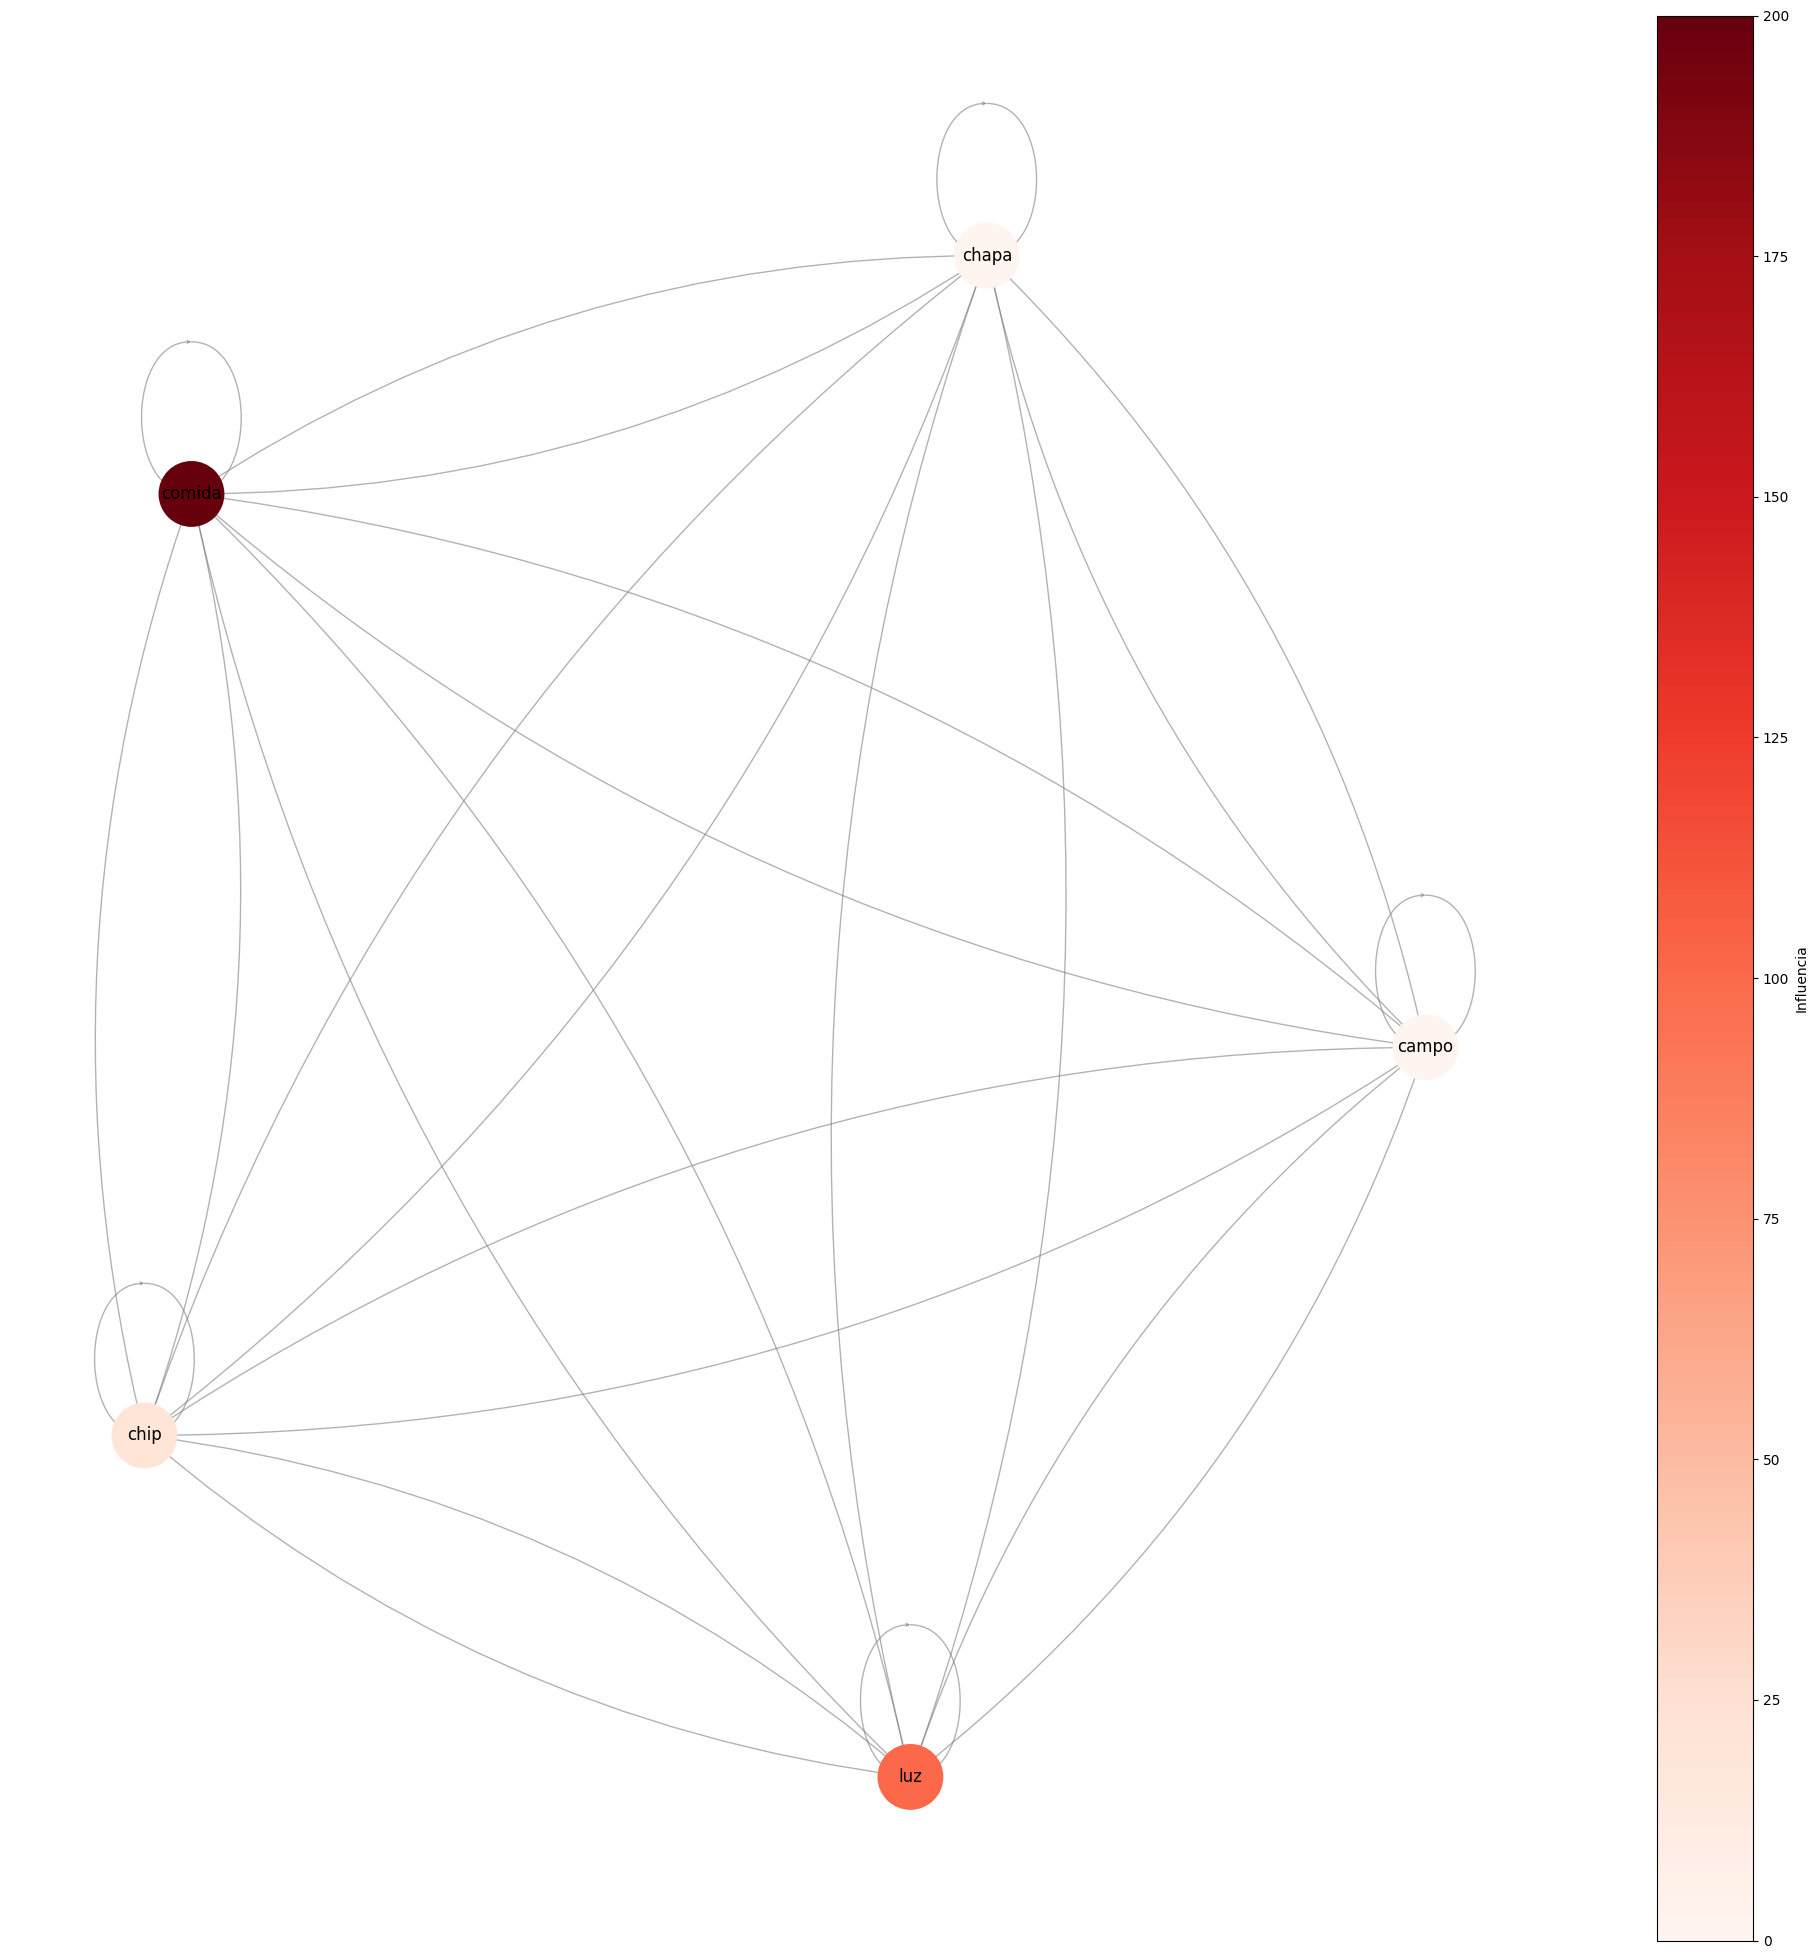

In [100]:
verInflacion(test, [200,100,100,120,300], [100,100,100,100,100])